In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math
from scipy.stats import spearmanr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from statsmodels.api import qqplot
from statsmodels.formula.api import ols  #linear regression
from statsmodels.formula.api import logit   #logistic regression
from statsmodels.graphics.mosaicplot import mosaic # plot confusion matrix

from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
from pathlib import Path

In [132]:
df = pd.read_csv(r"C:\MY FILE\MBAN 6110S-Data Science\group work\spotify_data.csv")

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

In [134]:
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [135]:
df.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'popularity',
       'year', 'genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [136]:
df['year'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011], dtype=int64)

In [137]:
df['artist_name'].value_counts()

artist_name
Traditional              4058
Grateful Dead            2320
Johann Sebastian Bach    2125
Giacomo Meyerbeer        1345
Elvis Presley            1242
                         ... 
Gaia Consort                1
Dzej Ramadanovski           1
Goca Trzan                  1
Robbie O'Connell            1
Sleep Therapist             1
Name: count, Length: 64158, dtype: int64

In [138]:
df['genre'].value_counts()

genre
black-metal       21852
gospel            21621
ambient           21389
acoustic          21097
alt-rock          20918
                  ...  
chicago-house      5170
dubstep            4774
detroit-techno     3920
rock               3319
songwriter          589
Name: count, Length: 82, dtype: int64

<Axes: >

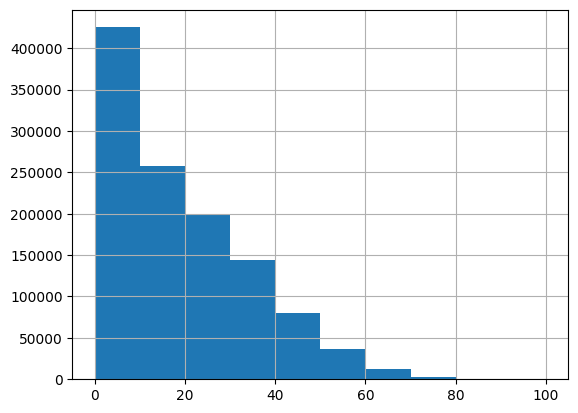

In [139]:
df['popularity'].hist()

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'time_signature'}>]], dtype=object)

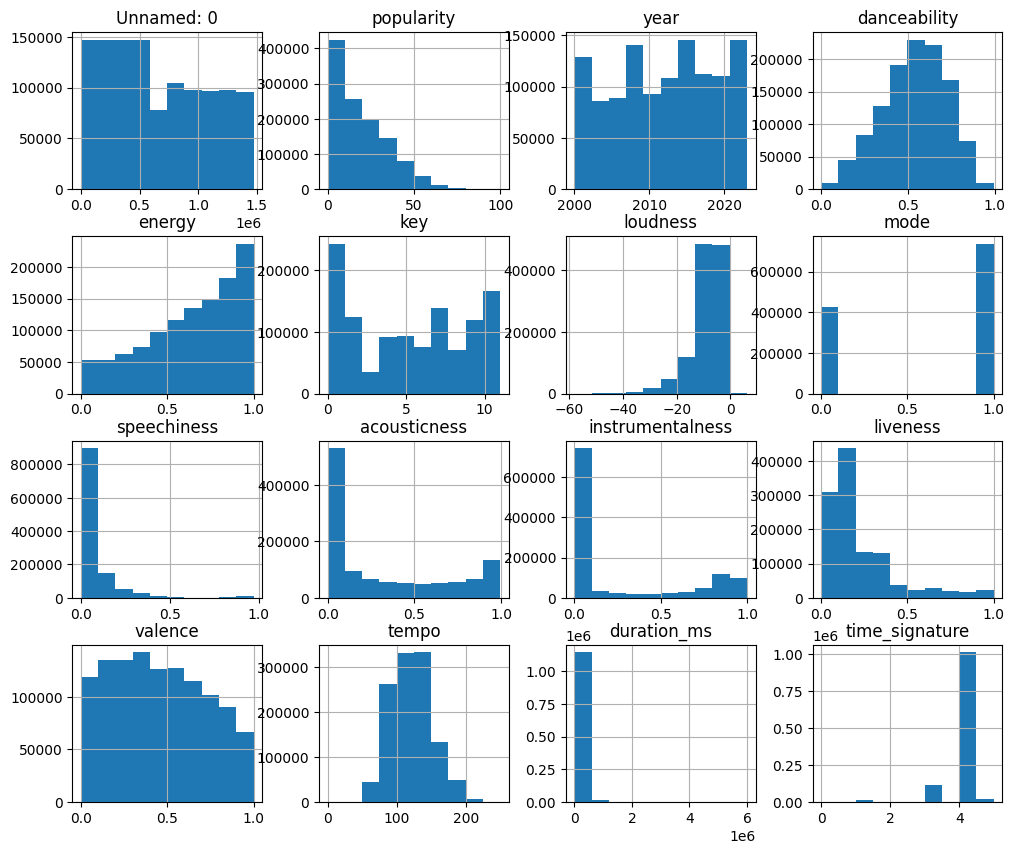

In [140]:
df.hist(figsize=(12, 10))

In [141]:
df.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'popularity',
       'year', 'genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [142]:
cols=['popularity', 'year', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

In [143]:
correlation = df[cols].corr()
print(correlation)

                  popularity      year  danceability    energy       key  \
popularity          1.000000  0.345821      0.098533  0.009401  0.000390   
year                0.345821  1.000000      0.040087  0.019595 -0.003480   
danceability        0.098533  0.040087      1.000000  0.139267  0.031363   
energy              0.009401  0.019595      0.139267  1.000000  0.038462   
key                 0.000390 -0.003480      0.031363  0.038462  1.000000   
loudness            0.104097  0.041415      0.257174  0.781006  0.026866   
mode               -0.023837 -0.031350     -0.051711 -0.052052 -0.167634   
speechiness        -0.024700  0.028864      0.086536  0.114176  0.012875   
acousticness       -0.059181 -0.025510     -0.176456 -0.752662 -0.034510   
instrumentalness   -0.152893  0.013620     -0.169122 -0.184331  0.000226   
liveness           -0.056968 -0.015538     -0.119671  0.189117 -0.005426   
valence            -0.018070 -0.100907      0.519900  0.247968  0.025928   
tempo       

In [144]:
corr_p =correlation.corr()['popularity'].sort_values(ascending=False)
corr_p

popularity          1.000000
year                0.577880
loudness            0.134644
danceability        0.121891
energy              0.019004
time_signature      0.005788
valence            -0.034770
tempo              -0.042912
key                -0.059567
acousticness       -0.097422
mode               -0.099888
speechiness        -0.110283
liveness           -0.182310
instrumentalness   -0.273504
duration_ms        -0.314190
Name: popularity, dtype: float64

In [145]:
df['time_signature'].unique()

array([3, 4, 5, 1, 0], dtype=int64)

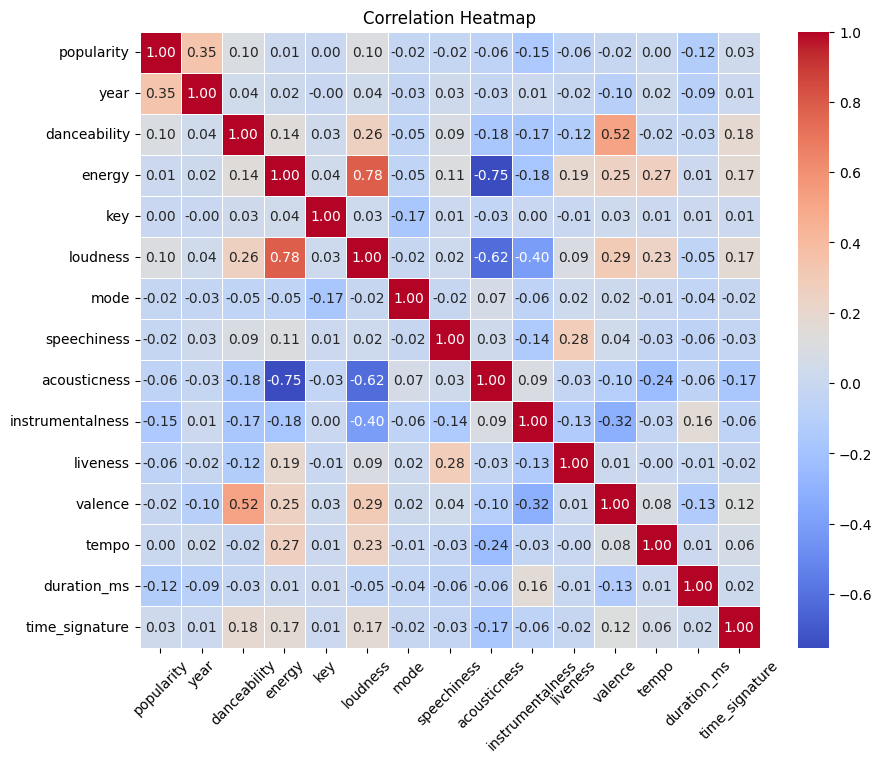

In [146]:


plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')  # Set the title of the heatmap
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)  # Keep y-axis labels as they are
plt.show()

Build models to predict

In [147]:
model_ols = ols('popularity ~  year + danceability + loudness + duration_ms + instrumentalness', data = df)
result_model_ols = model_ols.fit()
print(result_model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                 4.163e+04
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:41:11   Log-Likelihood:            -4.7571e+06
No. Observations:             1159764   AIC:                         9.514e+06
Df Residuals:                 1159758   BIC:                         9.514e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1571.4713      4.044  

In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [149]:
X = df.drop(['popularity'], axis=1)  # Features (all columns except 'popularity')
y = df['popularity']  # Target variable


In [150]:
df.drop(['Unnamed: 0', 'track_id'], axis=1, inplace=True)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 18 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1159749 non-null  object 
 1   track_name        1159763 non-null  object 
 2   popularity        1159764 non-null  int64  
 3   year              1159764 non-null  int64  
 4   genre             1159764 non-null  object 
 5   danceability      1159764 non-null  float64
 6   energy            1159764 non-null  float64
 7   key               1159764 non-null  int64  
 8   loudness          1159764 non-null  float64
 9   mode              1159764 non-null  int64  
 10  speechiness       1159764 non-null  float64
 11  acousticness      1159764 non-null  float64
 12  instrumentalness  1159764 non-null  float64
 13  liveness          1159764 non-null  float64
 14  valence           1159764 non-null  float64
 15  tempo             1159764 non-null  float64
 16  

In [152]:
df.head()

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming you have already loaded your data into a DataFrame named 'df'
# If not, replace this with your data loading code
# df = pd.read_csv('your_dataset.csv')

# Split the data into features (independent variables) and the target variable (popularity)
X = df.drop(['popularity'], axis=1)  # Features (all columns except 'popularity')
y = df['popularity']  # Target variable

# Identify the categorical columns (replace with actual column names)
categorical_columns = ['artist_name', 'track_name', 'genre']

# Create a column transformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'  # Pass through non-categorical columns without transformation
)

# Create and train the Random Forest Regression model using a pipeline
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


In [153]:
# identify the categorical cols
categorical_columns = ['genre', 'mode', 'artist_name', 'track_name','year','key']

In [154]:
# Create a column transformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'  # Pass through non-categorical columns without transformation
)

In [155]:
# Create and train the Random Forest Regression model using a pipeline
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model.fit(X_train, y_train)


ValueError: For a sparse output, all columns should be a numeric or convertible to a numeric.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already loaded your data into a DataFrame named 'df'
# If not, replace this with your data loading code
# df = pd.read_csv('your_dataset.csv')

# Split the data into features (independent variables) and the target variable (popularity)
X = df.drop(['popularity'], axis=1)  # Features (all columns except 'popularity')
y = df['popularity']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the columns that need different preprocessing steps (categorical and numerical features)
categorical_features = ['artist_name', 'track_name', 'genre']
numerical_features = ['year', 'danceability', 'energy', 'key', 'loudness',
                      'mode', 'speechiness', 'acousticness', 'instrumentalness',
                      'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

# Create the data preprocessing steps for numerical and categorical features
numerical_transformer = StandardScaler()  # Standardize numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # One-hot encode categorical features

# Combine the preprocessing steps into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Create the pipeline, combining preprocessing and model training
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', dt_model)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
